In [0]:
#import all needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

**read the csv file containing the data**

In [0]:
# making data frame 
data = pd.read_csv("diabetes.csv")

**explore the data**

In [0]:
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1


In [0]:
#check the types of each column 
data.dtypes

pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
diabetes         int64
dtype: object

In [0]:
#return all the columns in the dataframe
data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [0]:
print("The shape of the data = ",data.shape)
print("A summary")
data.describe().transpose()

The shape of the data =  (768, 9)
A summary


,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
triceps,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


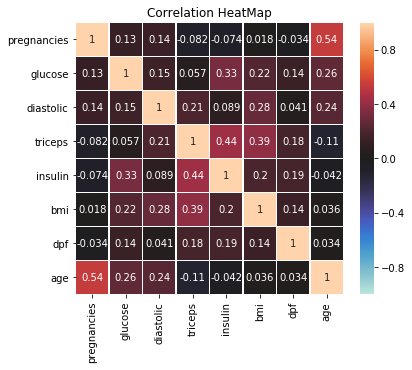

In [0]:
#view the correlation between the features
#filtering the dataframe to include just the IV's (features) and another with just the DV's (target)
features = data.loc[:,data.columns != 'diabetes']
targets = data.loc[:,data.columns == 'diabetes']

#creating pairwise correlation of columns using Pearson's R,
corr = features.corr(method='pearson') 

#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Correlation HeatMap')
plt.show()

**Prepare the data for learning with Neural Network**

In [0]:
#Transforms features by scaling each feature to a given range. which by default is feature_range=(0, 1),
scalar = MinMaxScaler() #create scaler object
X = data[['pregnancies','glucose','diastolic', 'triceps', 	'insulin', 'bmi', 	'dpf', 	'age']]
X = scalar.fit_transform(X) #transform the TV feature
y = targets.values.reshape(-1,1) #get the TV feature

In [0]:
#split into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

**train the Neural Network**

In [0]:
#here we used just one hidden layer with just one node so  if you want only 1 hidden layer with 5 hidden units hidden_layer_sizes=(5,).
#This can be said to be similar to simple logistic regression
#we used adam optimizer
#batch size = the number of training examples in one forward/backward pass at each epoch, when it is set as auto => min(200, n_samples)
mlp = MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', solver='adam', max_iter=500)

In [0]:
#fit the defined model on the training data
mlp.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
#hidden_layer_sizes argument set to three layers, which has the same number of neurons as the count of features in the dataset.
#We will also select relu as the activation function and adam as the solver for weight optimization.

In [0]:
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
#check the performance of the model on the training data
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[308  41]
 [ 70 118]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       349
           1       0.74      0.63      0.68       188

    accuracy                           0.79       537
   macro avg       0.78      0.76      0.76       537
weighted avg       0.79      0.79      0.79       537



In [0]:
#check the performance of the model on the test data
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[125  26]
 [ 31  49]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.61      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



The model seems to overfit on the training data. But in all it had a good performance

I acknowledge and recommend the following sites and repository

https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

https://gist.github.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f